In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import Bio.SeqUtils.MeltingTemp as mt

from dredFISH.Utils.__init__plots import *

In [2]:
def recalc_tm(seq, fmd=0, Na=1e-5, dnac1=0, dnac2=0):
    """
    """
    res = mt.Tm_NN(seq, Na=Na, dnac1=dnac1, dnac2=dnac2)
    res = mt.chem_correction(res, fmd=fmd)
    return res
    
def get_gc(seq):
    """
    """
    return (seq.count('G') + seq.count('C'))/len(seq)

In [3]:
ddir = "/bigstore/GeneralStorage/fangming/projects/dredfish/packages/PaintSHOP_pipeline/test11_chr1_plain_tm37-52/" 
f = os.path.join(ddir, "pipeline_output/03_output_files/03_rna_probes_iso/mm10_iso_newBalance.tsv")
header=[
    'chrom', 'start', 'end', # one based?
    'seq', 
    'tm', 
    'onscore',  # 0-100
    'offscore', # 0-10,000
    'repeat',
    'prob',
    'maxkmer',
    'strand',
    'gname',
    'transcripts',
]

df = pd.read_csv(f, sep="\t", header=None)
df.columns = header
df['len'] = df['end']-df['start']+1
df['gc'] = df['seq'].apply(get_gc) 
df

,chrom,start,end,seq,tm,onscore,offscore,repeat,prob,maxkmer,strand,gname,transcripts,len,gc
0,chr1,3214511,3214540,AAAAGCACCATGACCAAGGACACCGAAAAC,40.12,100.000,0.0,0,0.456,2,+,Xkr4,1,30,0.466667
1,chr1,3214541,3214570,AGAAAGCGGGAATGTTTACTTGCTGTGTGG,39.76,100.000,0.0,0,0.310,0,+,Xkr4,1,30,0.466667
2,chr1,3214625,3214654,ACAAATCTTAGCTGATGGAGTGGTAAGCCC,38.59,96.154,0.0,0,0.276,0,+,Xkr4,1,30,0.466667
3,chr1,3214679,3214708,AATGGCATACACATTGCATCTGTATGCTCT,37.39,84.943,0.0,0,0.177,0,+,Xkr4,1,30,0.400000
4,chr1,3214721,3214750,TGTGTCCCAAAGTCTCTAGTAGACACATCA,37.01,75.521,0.0,0,0.234,0,+,Xkr4,1,30,0.433333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93151,chr1,195163555,195163584,TTTTGACTTCAGGAGGAGGGTCACAAGAAA,38.19,78.617,0.0,0,0.349,0,+,Cr2,2,30,0.433333
93152,chr1,195176574,195176603,GAGTGAAGAAAACCCAGAGCGAACCCAAGG,41.01,98.018,0.0,0,0.521,0,+,Cr2,2,30,0.533333
93153,chr1,195176604,195176633,ATCCCATGTGTGCAGCAGTCCAATGGCAGG,44.40,98.132,0.0,0,0.321,0,+,Cr2,2,30,0.566667
93154,chr1,195176634,195176663,TTGCGCTCTGTGAGTTGTGAGCCTGTAGCA,43.44,97.849,0.0,0,0.318,0,+,Cr2,2,30,0.533333


In [4]:
assert np.all(df['len'] == 30)

dfnew = df.copy()
print(dfnew.shape)

cond = dfnew['repeat']==0
dfnew = dfnew[cond]
print(dfnew.shape)

cond = dfnew['offscore']<50 
dfnew = dfnew[cond]
print(dfnew.shape)

cond = dfnew['onscore']>97
dfnew = dfnew[cond]
print(dfnew.shape)

cond = dfnew['maxkmer']<=5
dfnew = dfnew[cond]
print(dfnew.shape)

cond = dfnew['prob']<=0.5
dfnew = dfnew[cond]
print(dfnew.shape)

(93156, 15)
(86874, 15)
(83628, 15)
(45742, 15)
(45688, 15)
(44786, 15)


<AxesSubplot:xlabel='prob', ylabel='Count'>

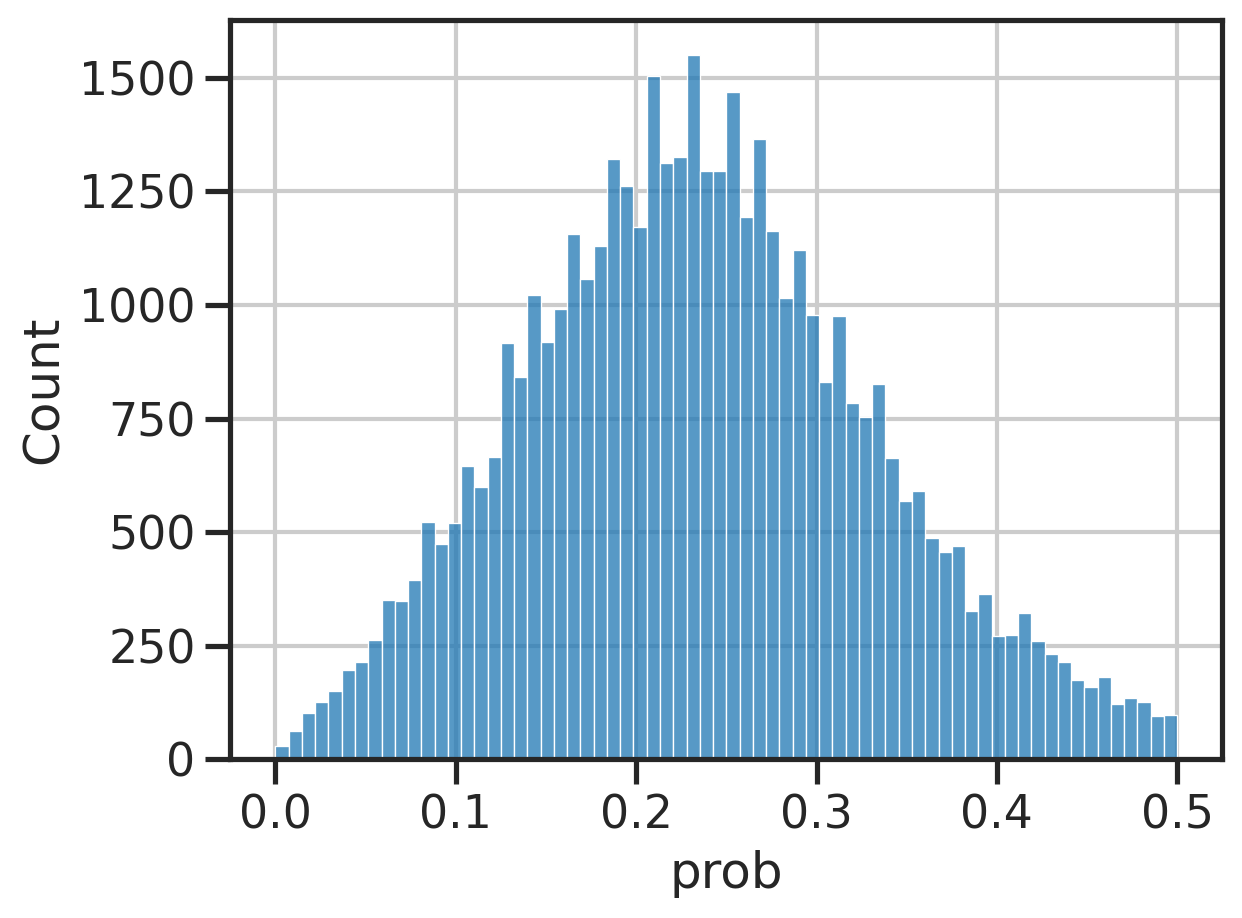

In [5]:
sns.histplot(dfnew['prob'])

Text(0, 0.5, 'max k-mer')

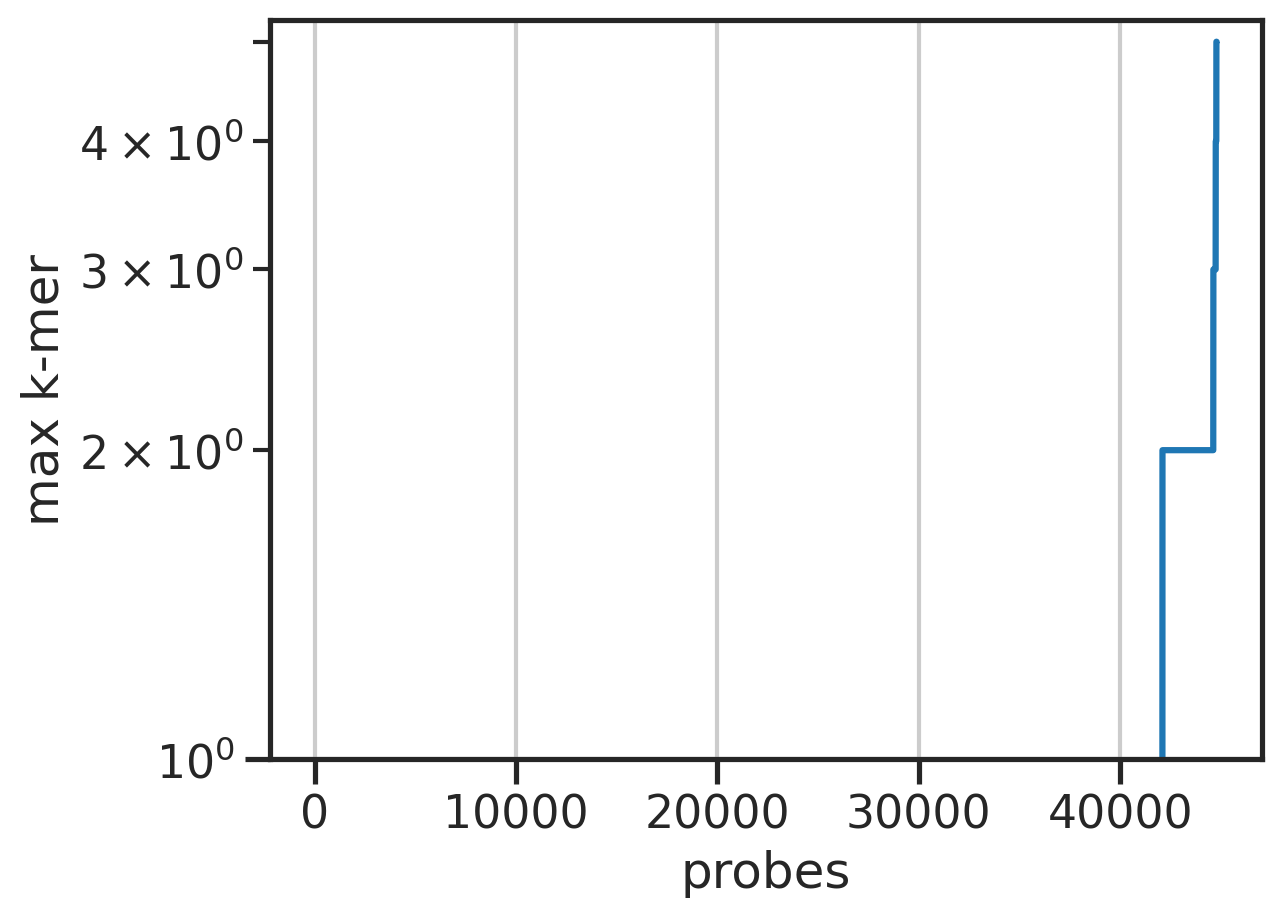

In [6]:
plt.plot(np.sort(dfnew['maxkmer']))
plt.ylim([1, None])
plt.yscale('log')
plt.xlabel('probes')
plt.ylabel('max k-mer')

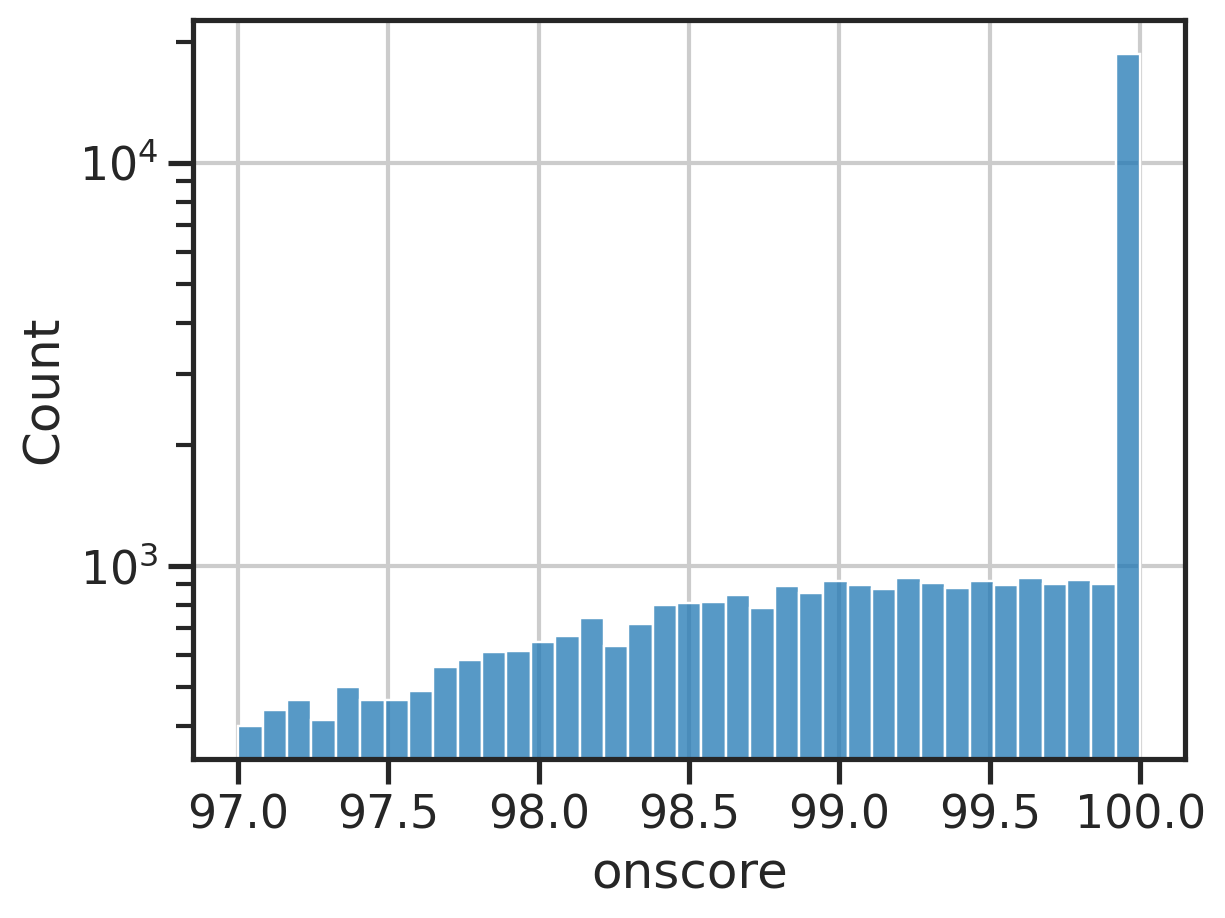

In [7]:
sns.histplot(dfnew['onscore'])
plt.yscale('log')

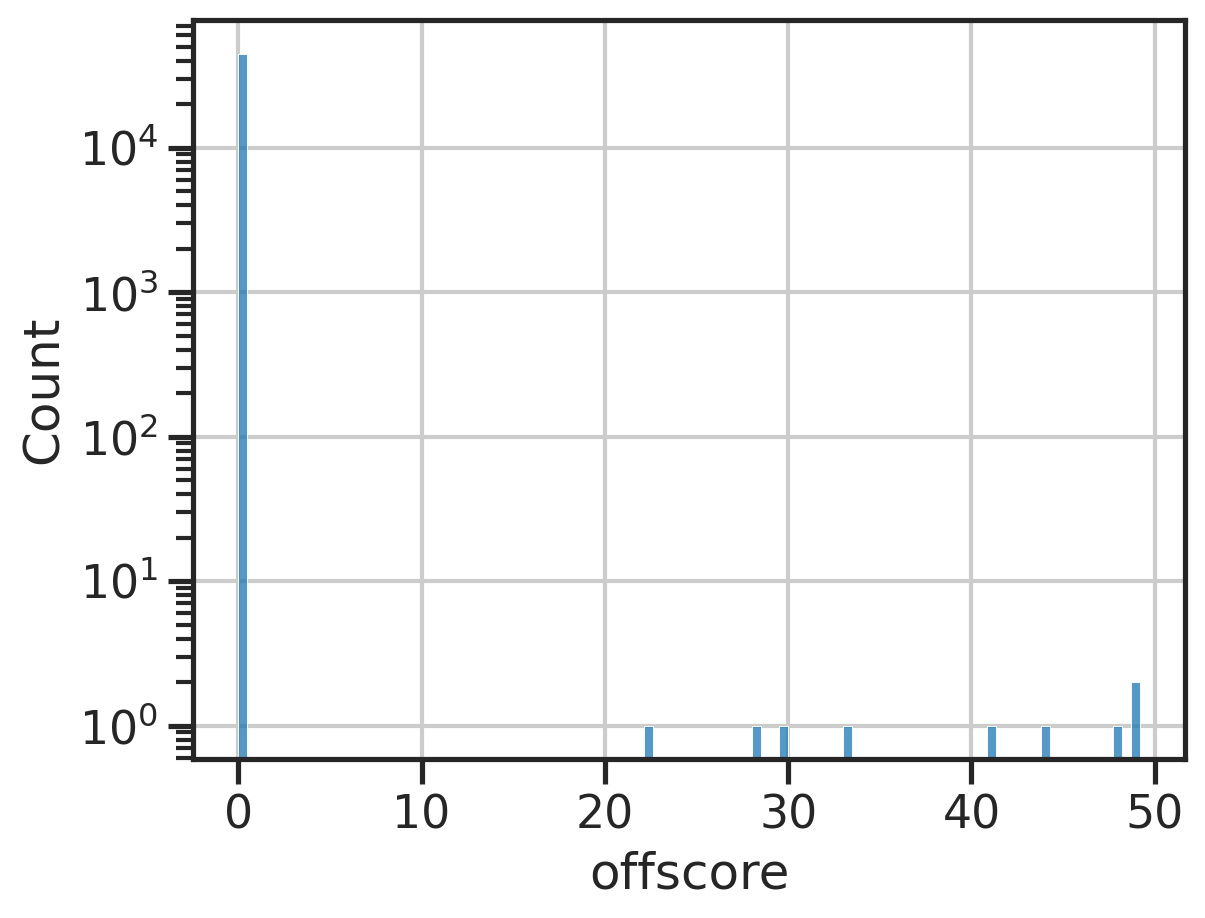

In [8]:
sns.histplot(dfnew['offscore'], bins=100) #, bins=np.arange(0, 1000, 10))
plt.yscale('log')

([<matplotlib.axis.XTick at 0x7fd61a1d0df0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

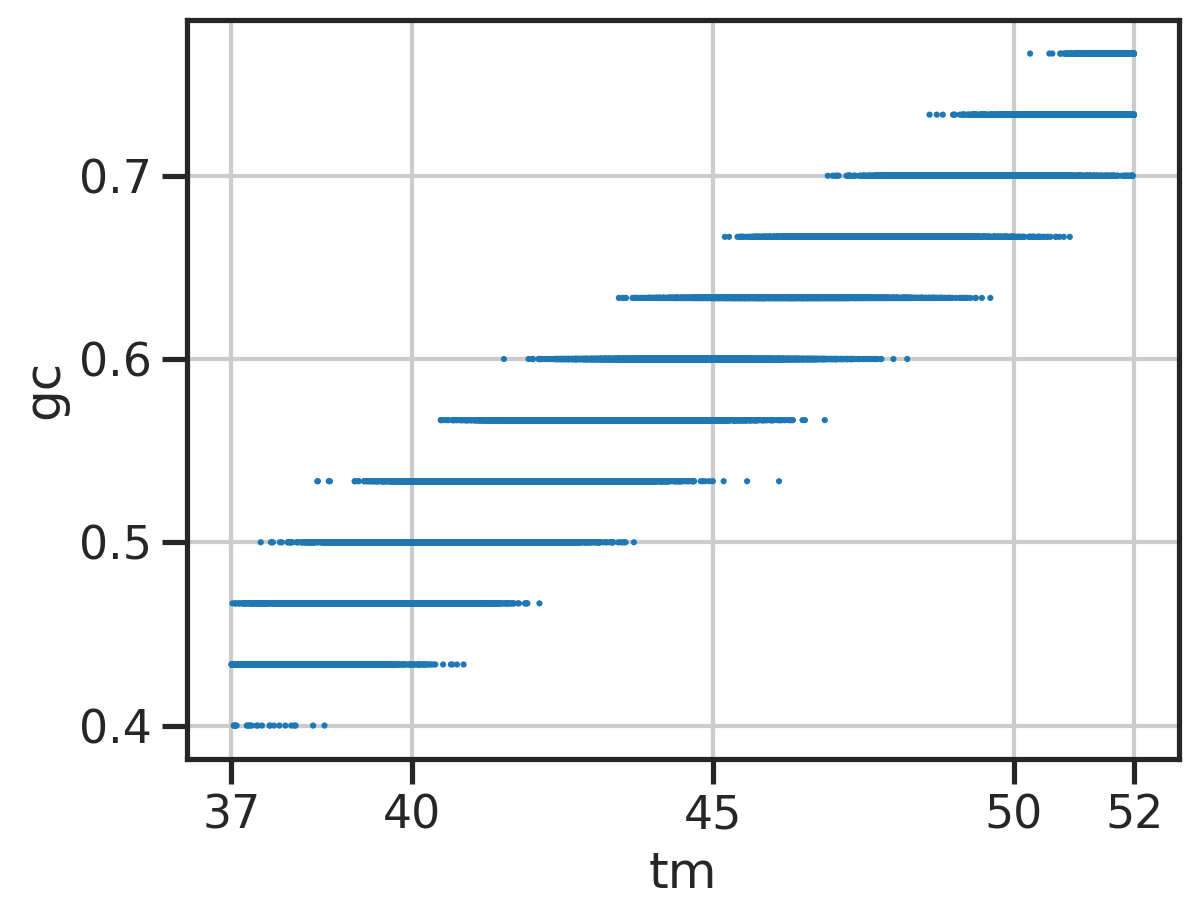

In [24]:
sns.scatterplot(data=dfnew, x='tm', y='gc', edgecolor='none', s=5) 
plt.xticks([37, 40, 45, 50, 52])

<AxesSubplot:xlabel='onscore', ylabel='offscore'>

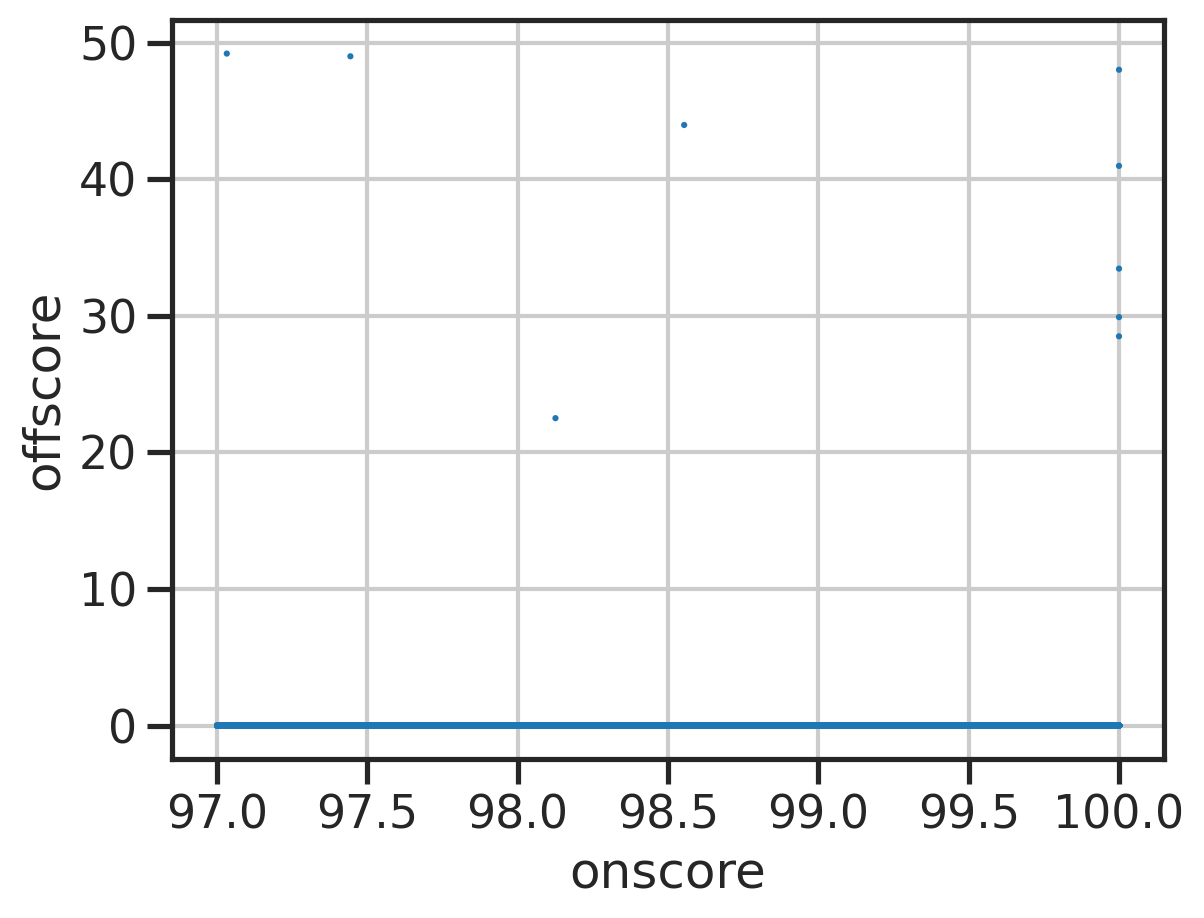

In [10]:
sns.scatterplot(data=dfnew, x='onscore', y='offscore', edgecolor='none', s=5) 

<AxesSubplot:xlabel='onscore', ylabel='prob'>

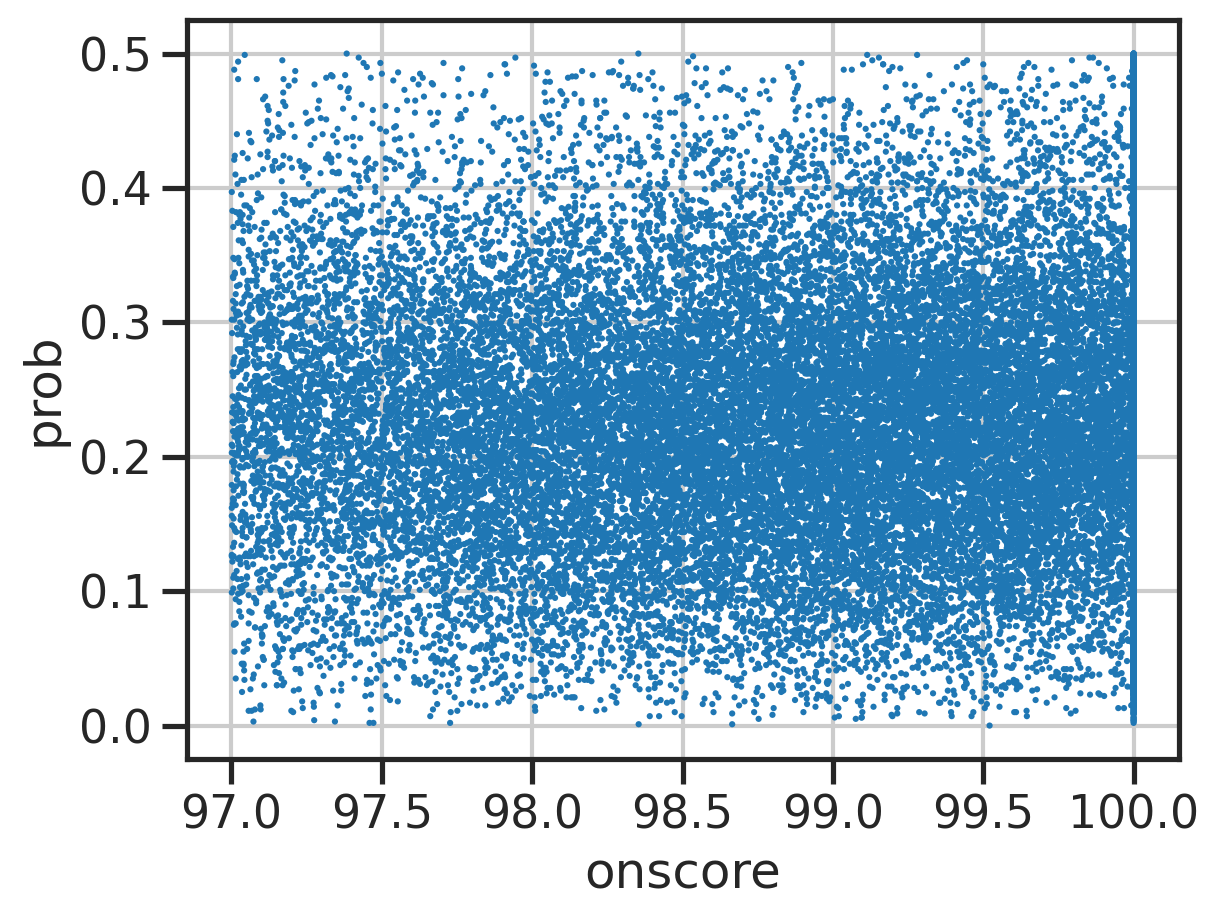

In [11]:
sns.scatterplot(data=dfnew, x='onscore', y='prob', edgecolor='none', s=5) 

In [12]:
gene_cnstrnts = df.groupby('gname').size()
gene_cnstrnts_new = dfnew.groupby('gname').size()# .reindex(gene_constraints.index)

# cnstrnts = pd.DataFrame(gene_cnstrnts)
# cnstrnts = cnstrnts.join(gene_cnstrnts_v3.to_frame())
# cnstrnts = cnstrnts.join(gene_cnstrnts_v3.to_frame())
# cnstrnts

In [13]:
cnstrnts = pd.DataFrame(gene_cnstrnts)
cnstrnts = cnstrnts.join(pd.DataFrame(gene_cnstrnts_new).rename(columns={0:1}))
cnstrnts = cnstrnts.fillna(0).astype(int)
cnstrnts

,0,1
gname,,
1600012P17Rik,57,14
1700001G17Rik,25,15
1700003I22Rik,10,8
1700007P06Rik,22,3
1700016C15Rik,17,7
...,...,...
Zfp281,92,29
Zfp451,8,5
Zfp648,85,65


Text(0, 0.5, 'Num. probes')

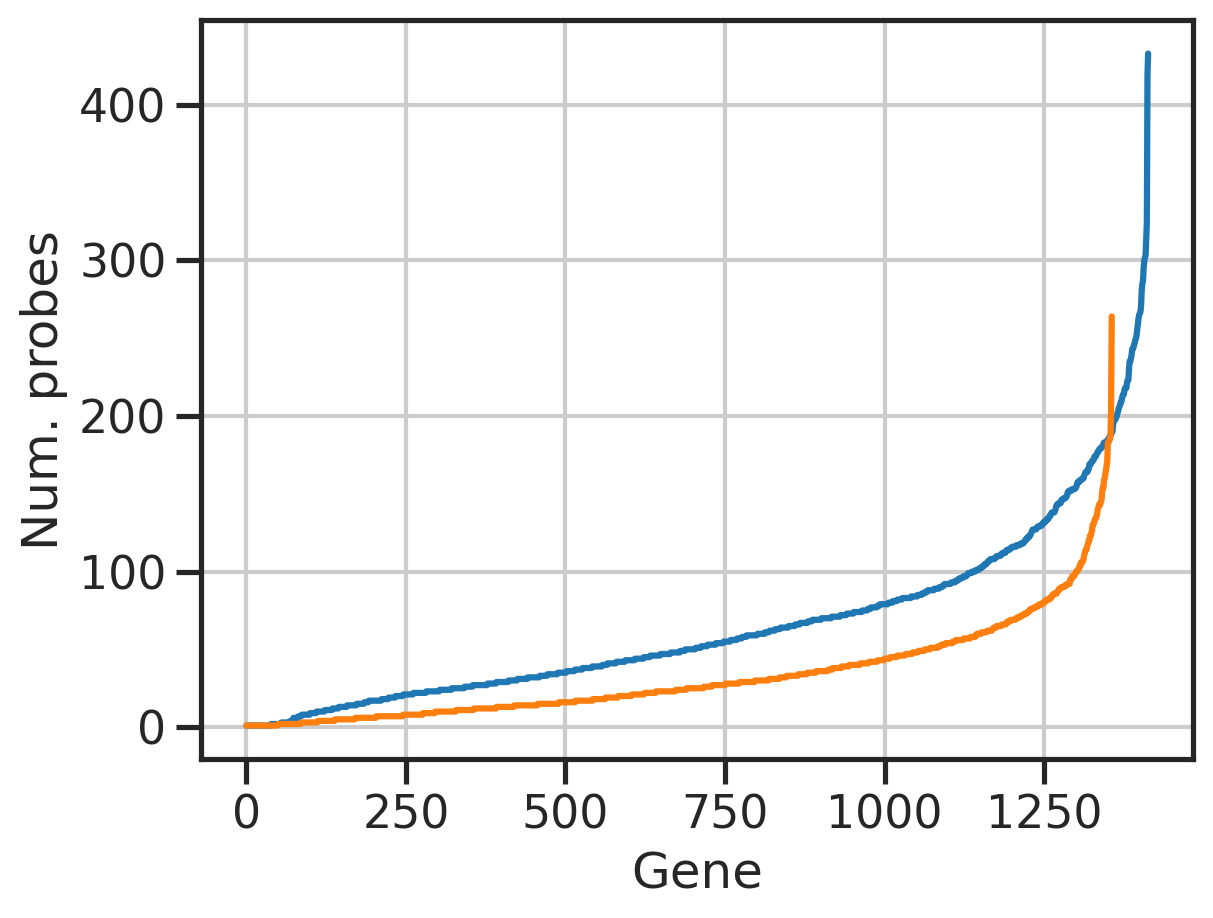

In [14]:
plt.plot(np.sort(gene_cnstrnts))
plt.plot(np.sort(gene_cnstrnts_new))
plt.xlabel('Gene')
plt.ylabel('Num. probes')

Text(0, 0.5, 'Num. probes')

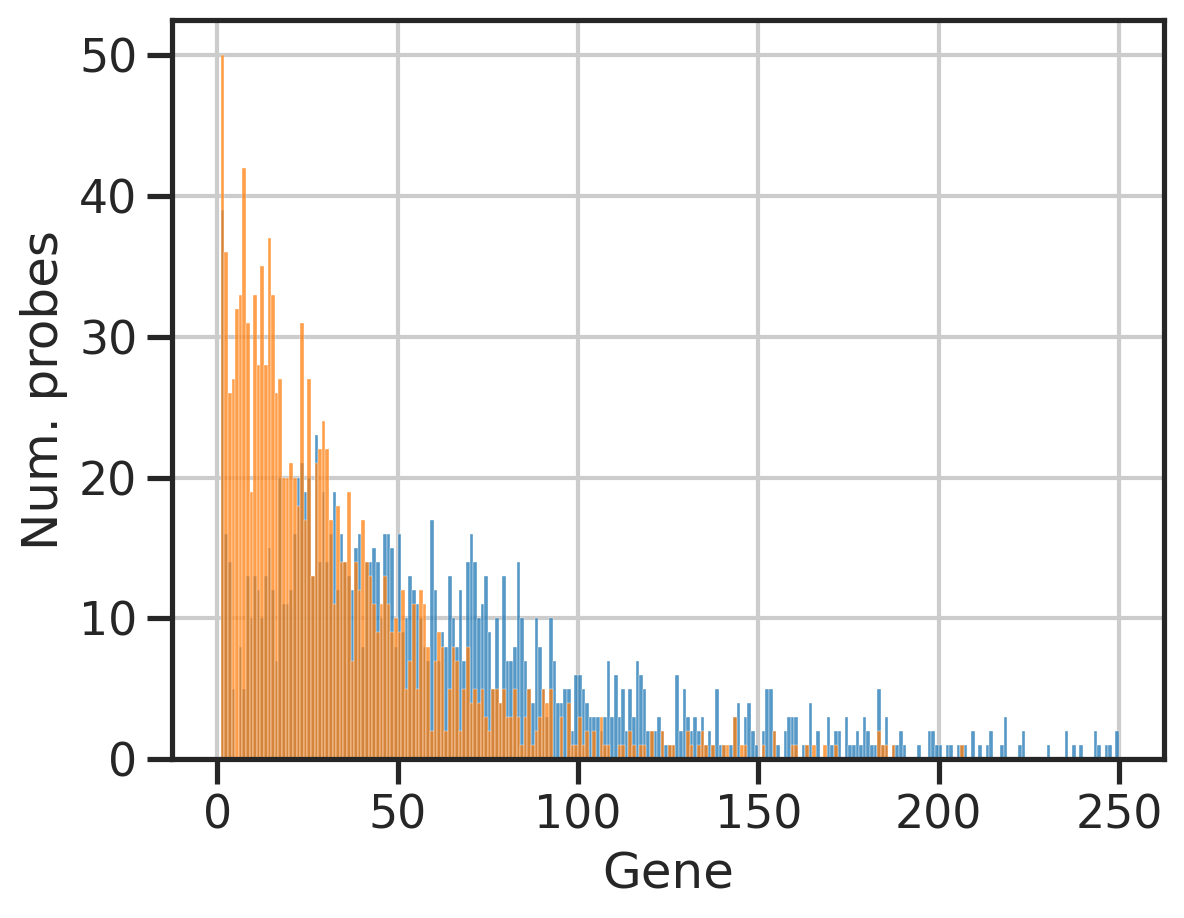

In [15]:
sns.histplot(np.sort(gene_cnstrnts),     color='C0', bins=np.linspace(0,250,251))
sns.histplot(np.sort(gene_cnstrnts_new), color='C1', bins=np.linspace(0,250,251))
plt.xlabel('Gene')
plt.ylabel('Num. probes')

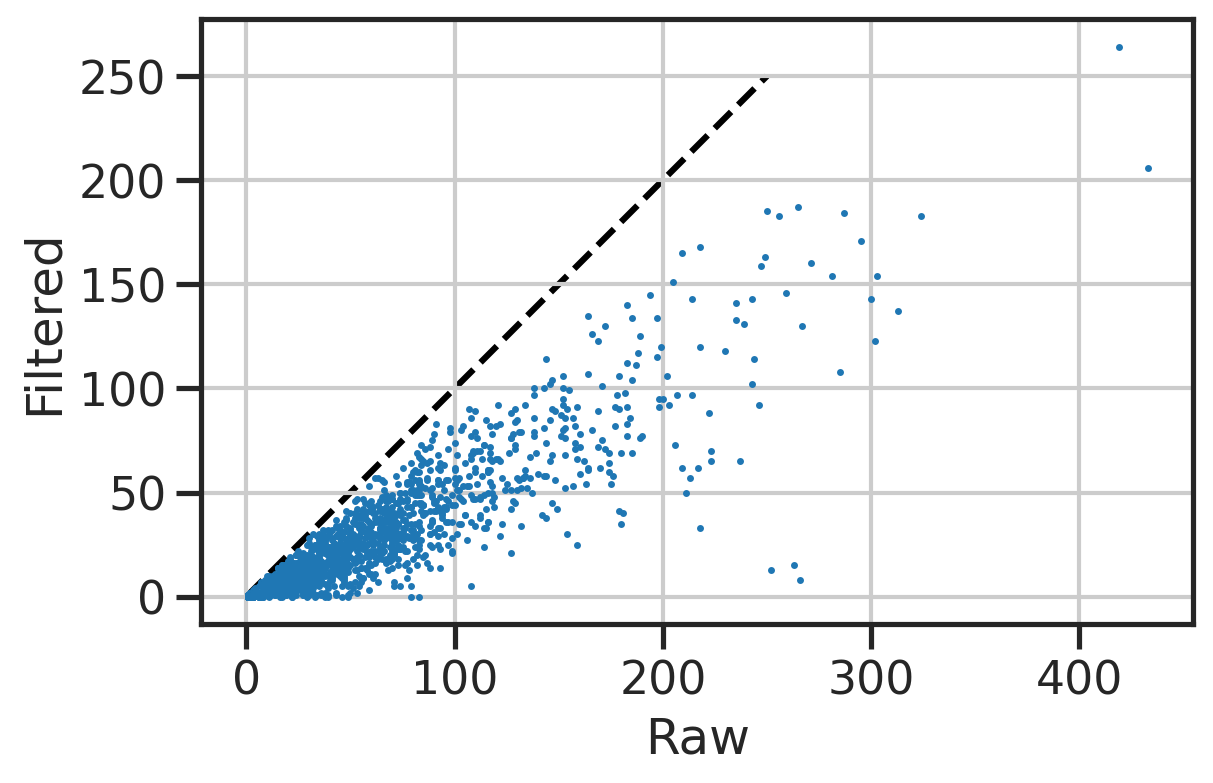

In [20]:
fig, ax = plt.subplots()
ax.scatter(cnstrnts[0], cnstrnts[1], s=1)
ax.plot([0,250], [0,250], '--k', zorder=0)
ax.set_aspect('equal')
ax.set_xlabel('Raw')
ax.set_ylabel('Filtered')
plt.show()

In [17]:
dfviz = df.iloc[:10000].copy()
dfviz['dfttm'] = dfviz['seq'].apply(lambda x: recalc_tm(x, fmd=50, Na=390, dnac1=25, dnac2=25))
dfviz['ourtm'] = dfviz['seq'].apply(lambda x: recalc_tm(x, fmd=30, Na=300, dnac1=2,  dnac2=0.001))
dfviz['mattm'] = dfviz['seq'].apply(lambda x: recalc_tm(x, fmd=0,  Na=300, dnac1=2,  dnac2=2)) 
dfviz

,chrom,start,end,seq,tm,onscore,offscore,repeat,prob,maxkmer,strand,gname,transcripts,len,gc,dfttm,ourtm,mattm
0,chr1,3214511,3214540,AAAAGCACCATGACCAAGGACACCGAAAAC,40.12,100.000,0.0,0,0.456,2,+,Xkr4,1,30,0.466667,40.118889,49.902234,68.722494
1,chr1,3214541,3214570,AGAAAGCGGGAATGTTTACTTGCTGTGTGG,39.76,100.000,0.0,0,0.310,0,+,Xkr4,1,30,0.466667,39.761150,49.552458,68.374389
2,chr1,3214625,3214654,ACAAATCTTAGCTGATGGAGTGGTAAGCCC,38.59,96.154,0.0,0,0.276,0,+,Xkr4,1,30,0.466667,38.591548,48.337885,67.150450
3,chr1,3214679,3214708,AATGGCATACACATTGCATCTGTATGCTCT,37.39,84.943,0.0,0,0.177,0,+,Xkr4,1,30,0.400000,37.389299,47.152698,65.968853
4,chr1,3214721,3214750,TGTGTCCCAAAGTCTCTAGTAGACACATCA,37.01,75.521,0.0,0,0.234,0,+,Xkr4,1,30,0.433333,37.007756,46.753305,65.565742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,chr1,37428363,37428392,AAAGGAATACTGCAAAGCTCTACAGTTGCC,37.79,96.569,0.0,0,0.158,0,+,Coa5,1,30,0.433333,37.789523,47.578308,66.399756
9996,chr1,37428393,37428422,TTCCTTCAAACACTGCCGTGGGGATTTTCC,41.30,100.000,0.0,0,0.235,0,+,Coa5,1,30,0.500000,41.297023,51.043566,69.856112
9997,chr1,37429893,37429922,CAGACATGCACCCAGATCCTCCTTCACGCC,43.85,100.000,0.0,0,0.382,0,+,Coa5,1,30,0.600000,43.845325,53.606632,72.422204
9998,chr1,37429924,37429953,GCACACGCGCCGCCCTCCGGCTTGTCCTCA,51.99,100.000,0.0,0,0.112,0,+,Coa5,1,30,0.733333,51.985651,61.746998,80.562403


Text(0, 0.5, 'our setting TM')

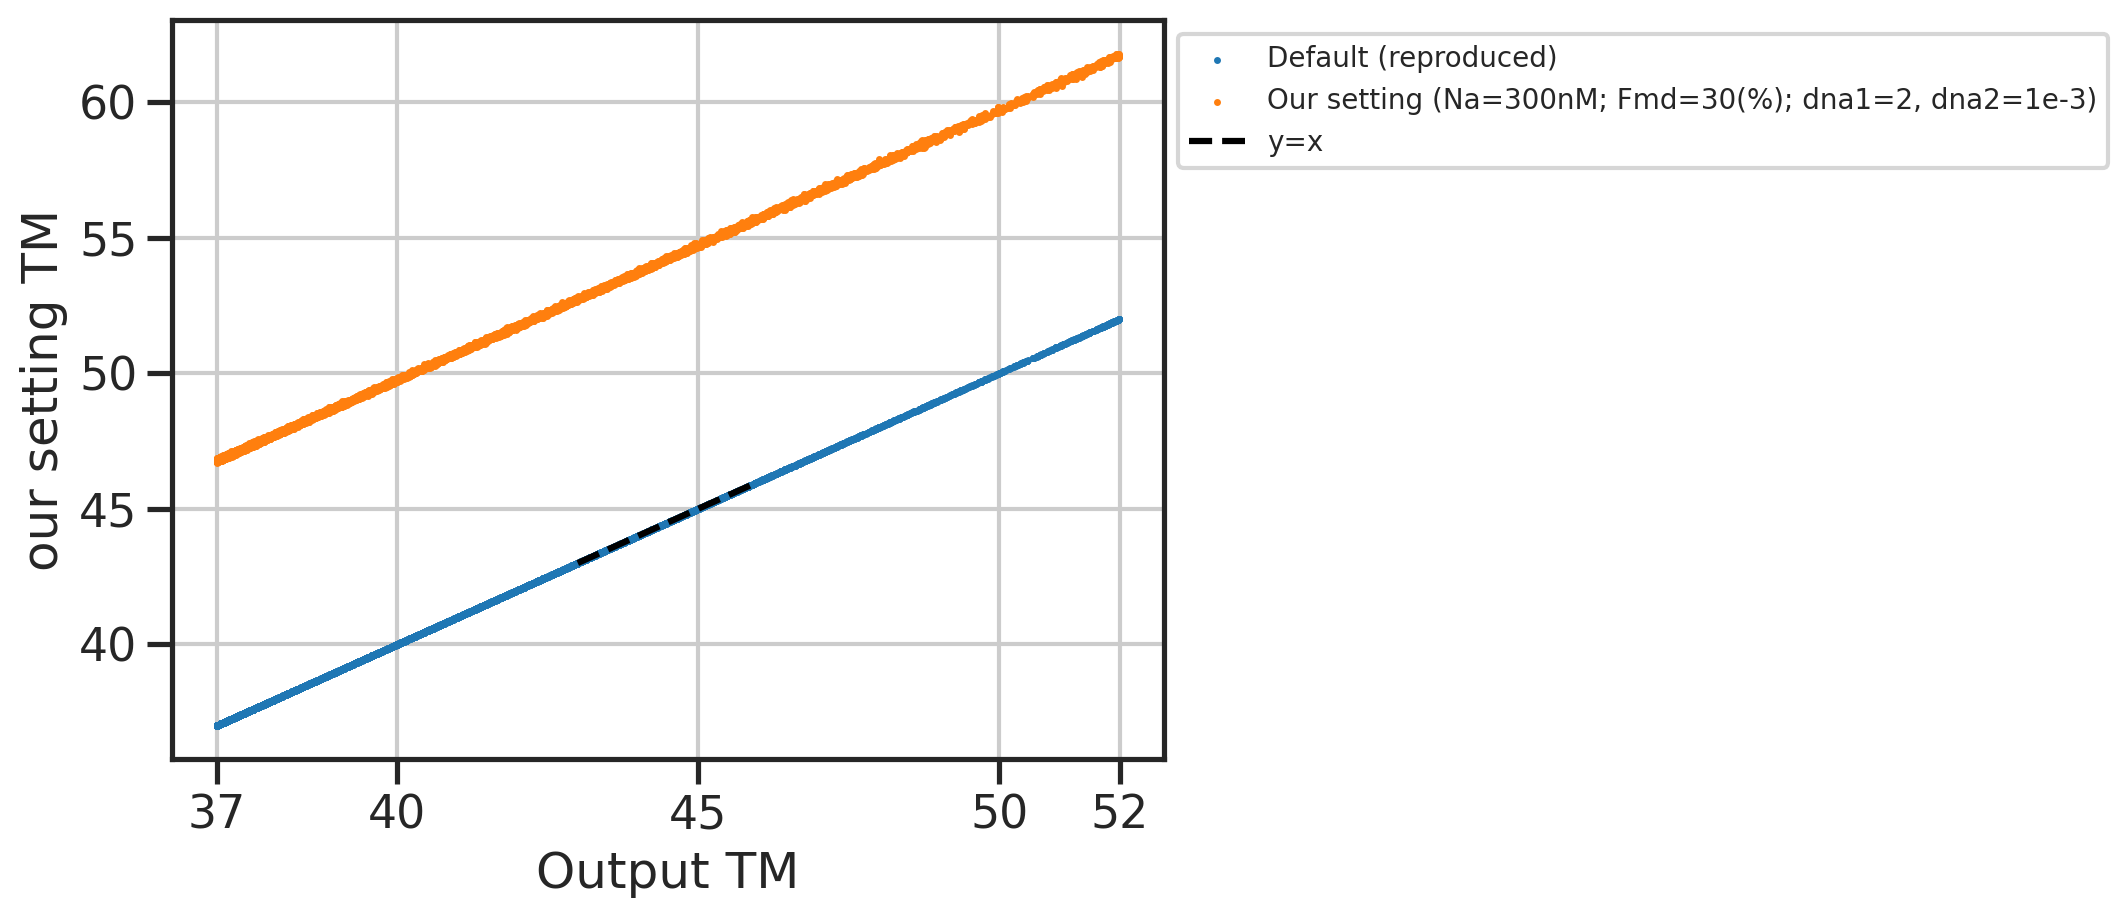

In [23]:
plt.scatter(dfviz['tm'].values, 
            dfviz['dfttm'].values,
            s=1,
            label="Default (reproduced)",
            ) 
plt.scatter(dfviz['tm'].values, 
            dfviz['ourtm'].values,
            s=1,
            label="Our setting (Na=300nM; Fmd=30(%); dna1=2, dna2=1e-3)",
            ) 
plt.plot([43,46], [43,46], '--k', label='y=x')
plt.xticks([37, 40, 45, 50, 52])
plt.legend(bbox_to_anchor=(1,1), fontsize=10)
plt.xlabel("Output TM")
plt.ylabel("our setting TM")

Text(0, 0.5, 'Diff')

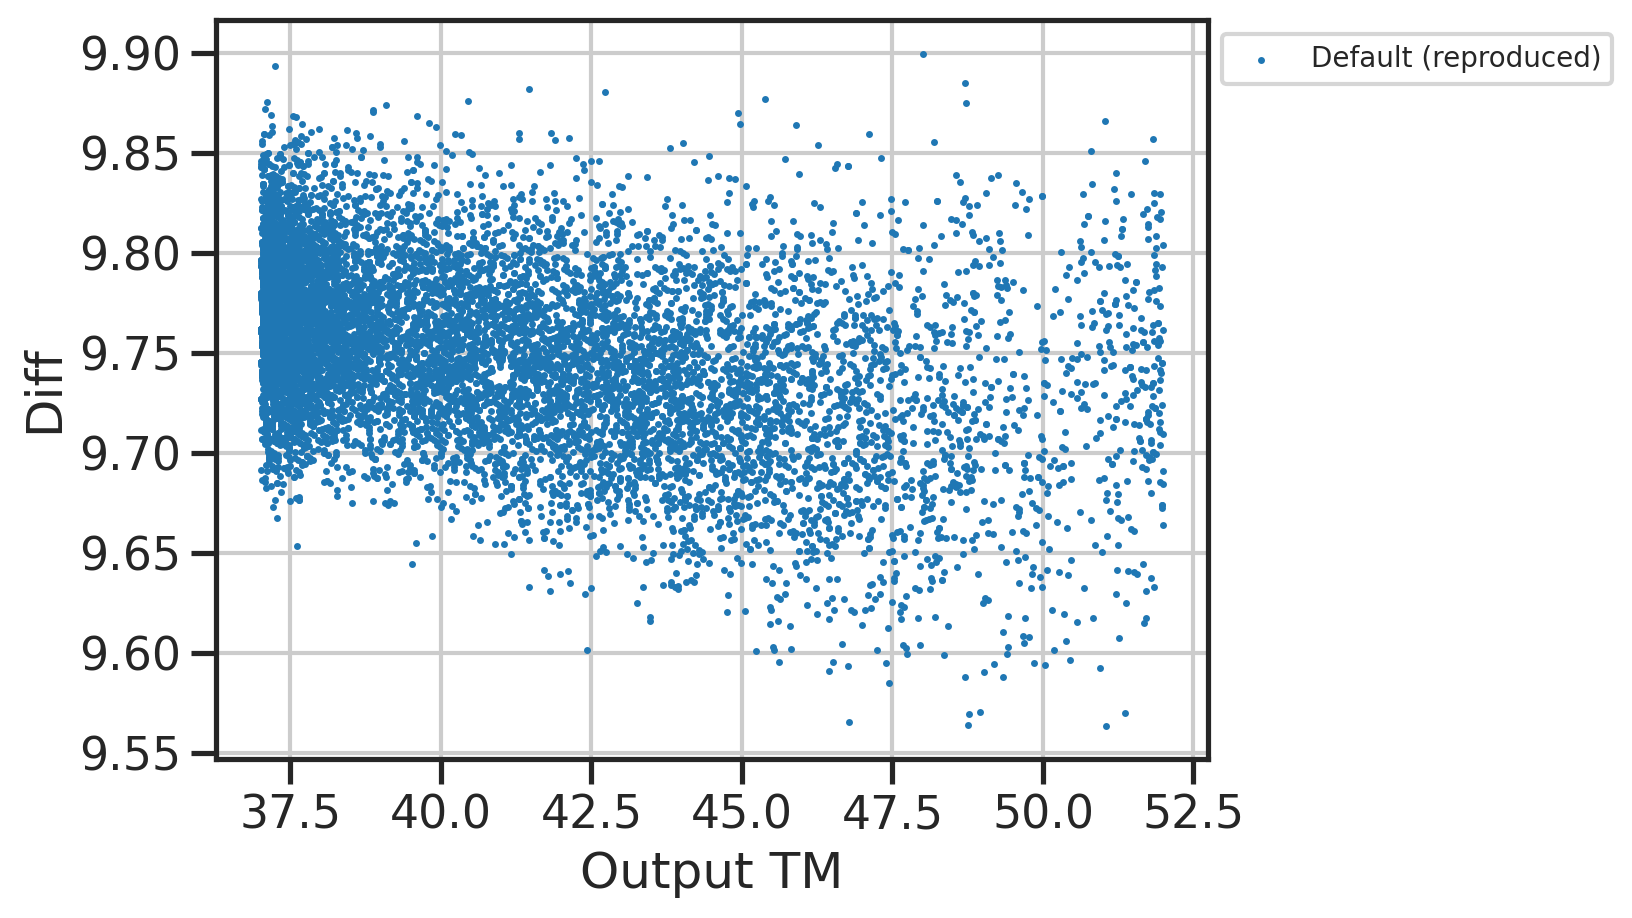

In [19]:
plt.scatter(dfviz['tm'].values, 
            dfviz['ourtm'].values - dfviz['dfttm'].values,
            s=1,
            label="Default (reproduced)",
            ) 
plt.legend(bbox_to_anchor=(1,1), fontsize=10)
plt.xlabel("Output TM")
plt.ylabel("Diff")